In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.fft import fft, fftfreq
import pandas as pd

# Continous Fourier Transform

Euler's function $f(\theta)$, which expresses a complex exponential in terms of trigonometric functions:

$
f(\theta) = e^{i \theta} = \cos(\theta) + i \sin(\theta)
$

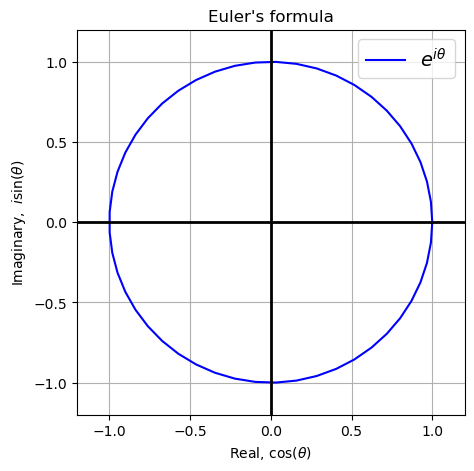

In [16]:
def euler_formula(x):
    return np.cos(x) + 1j * np.sin(x)

y = euler_formula(np.linspace(0, 2 * np.pi, 50))

plt.figure(figsize=(5,5))
plt.plot(np.real(y), np.imag(y), color="blue", label=r"$e^{i\theta}$")
plt.axhline(0, color='black', lw=2)
plt.axvline(0, color='black', lw=2)
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.xlabel(r"Real, cos($\theta$)")
plt.ylabel(r"Imaginary,  $i$sin($\theta$)")
plt.title("Euler's formula")
plt.legend(prop=dict(size=14))
plt.grid(True)
plt.show()

$
\theta = \omega t,
$

where $\theta$ is phase angle, $\omega$ is the angular velocity and $t$ is time.

$
\omega = \frac{\theta}{t} = \frac{2 \pi}{T},
$

where $2\pi$ radians completing one full cycle is achived during a period $T$.

Frequency $f$ is inverse of a period: $f = \frac{1}{T}$, therefore:

$
\omega = 2 \pi f
$

$
\theta = 2 \pi f t
$

## Fourier transformation formula

$
\hat{F}(f,t) = \int_{-\infty}^{\infty} f(t) \ e^{-i 2 \pi f t}dt,
$

where $e^{-i}$ indicates clockwise rotation of a vector on Gauss plane by an angle defined by $2 \pi f t$ and scaled by $f(t)$.

In [17]:
from dataclasses import dataclass
import numpy as np
import matplotlib.pyplot as plt

@dataclass
class Fourier:

    time_domain: np.ndarray
    function: callable

    def transform(self, angular_freq, plot: bool = False):

        real_part = self.function(self.time_domain) * np.cos(2 * np.pi * angular_freq * self.time_domain)
        imag_part = self.function(self.time_domain) * np.sin(2 * np.pi * angular_freq * self.time_domain)
        complex_numbers = real_part - 1j * imag_part

        t_min = self.time_domain[0]
        t_max = self.time_domain[-1]
        
        def real_integrand(t):
            return self.function(t) * np.cos(2 * np.pi * angular_freq * t)
        
        def imag_integrand(t):
            return self.function(t) * np.sin(2 * np.pi * angular_freq * t)
        
        real_integral = quad(real_integrand, t_min, t_max)[0]
        imag_integral = quad(imag_integrand, t_min, t_max)[0]
        integral = real_integral - 1j * imag_integral

        if plot:
            _, ax = plt.subplots(figsize=(5, 5))
            ax.plot(np.real(complex_numbers), np.imag(complex_numbers), color="blue", 
                    label="$f(t)e^{-i \omega t}$")
            ax.scatter(np.real(integral), np.imag(integral), marker="o", color="turquoise", edgecolors="black", zorder=3, s=50, 
                       label="$\int f(t)e^{-i \omega t} dt$")
            ax.minorticks_on()
            ax.tick_params(which='minor', width=0.5, length=3)
            ax.tick_params(which='major', width=2, length=6, direction="inout", labelsize=11)
            ax.set_facecolor("lightgray")
            ax.grid(True, which='major', linewidth=2, linestyle='-', alpha=0.9, color="white")
            ax.grid(True, which='minor', linewidth=1, linestyle=':', alpha=0.9, color="white")
            ax.set_axisbelow(True)
            ax.axhline(0, color="black")
            ax.axvline(0, color="black")
            ax.set_xlabel("Real part, $\cos(\omega t)$")
            ax.set_ylabel("Imaginary part, $i \ \sin(\omega t)$")
            ax.set_title("$\omega$"+f"={angular_freq}")
            ax.legend(loc='center left', bbox_to_anchor=(1, 0.8), fancybox=True, shadow=True, edgecolor="black")
        
        return complex_numbers, integral

    def transform_spectrum(self, angular_freq):

        def transform(omega):
            t_min = self.time_domain[0]
            t_max = self.time_domain[-1]
            
            def real_integrand(t):
                return self.function(t) * np.cos(2 * np.pi * omega * t)
            
            def imag_integrand(t):
                return self.function(t) * np.sin(2 * np.pi * omega * t)
            
            real_integral, _ = quad(real_integrand, t_min, t_max)
            imag_integral, _ = quad(imag_integrand, t_min, t_max)
            return real_integral - 1j * imag_integral

        complex_numbers = np.vectorize(transform)(angular_freq)

        return complex_numbers

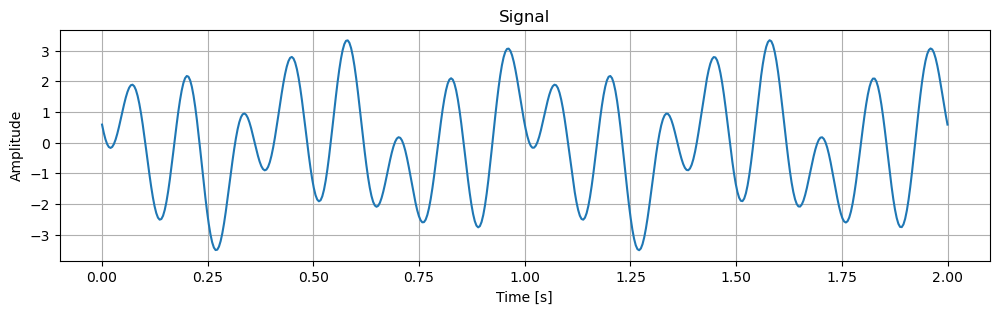

In [18]:
time = np.linspace(0, 2, 500) # seconds

def f(t):
    return np.cos(2 * 2 * np.pi * t) + 1 * np.cos(5 * 2 * np.pi * t) + 2 * np.cos(8 * 2 * np.pi * t + 3/4*np.pi)

plt.figure(figsize=(12,3))
plt.plot(time, f(time))
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Signal")
plt.grid(True)
plt.show()

In [19]:
ft = Fourier(time_domain=time, function=f)
freqs = np.linspace(0, 10, 500)
transformed = ft.transform_spectrum(angular_freq=freqs)

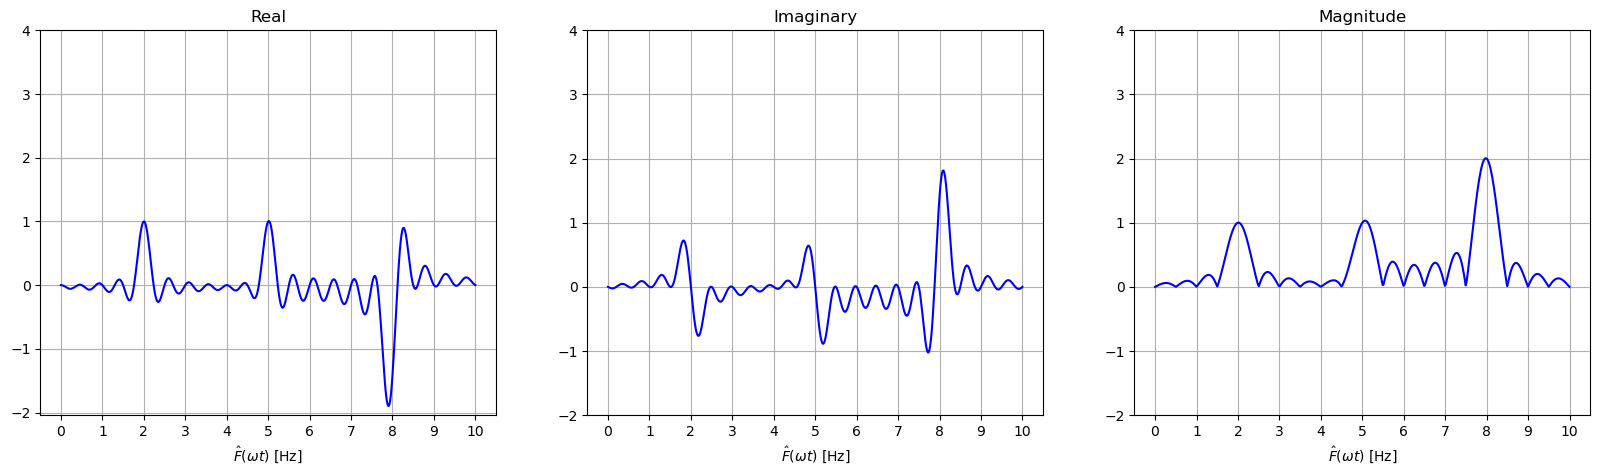

In [20]:
fig, axes = plt.subplots(figsize=(20,5), nrows=1, ncols=3)

ax = axes[0]
ax.plot(freqs, np.real(transformed), color="blue")   
ax.set_title("Real")
ax = axes[1]
ax.plot(freqs, np.imag(transformed), color="blue")   
ax.set_title("Imaginary")
ax = axes[2]
ax.plot(freqs, np.abs(transformed), color="blue")   
ax.set_title("Magnitude")

for ax in axes:
    ax.set_xlabel(r"$\hat{F}(\omega t)$"+" [Hz]")
    ax.set_xticks(np.arange(0, 11, 1))
    ax.set_yticks(np.arange(-2, 5, 1))
    ax.grid(True)

plt.show()

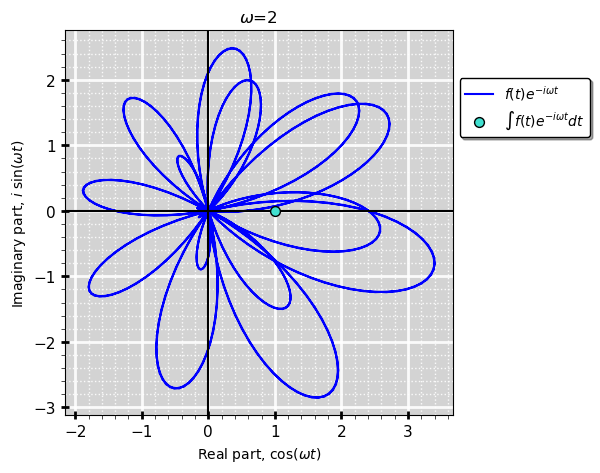

In [21]:
complex = ft.transform(angular_freq=2, plot=True)

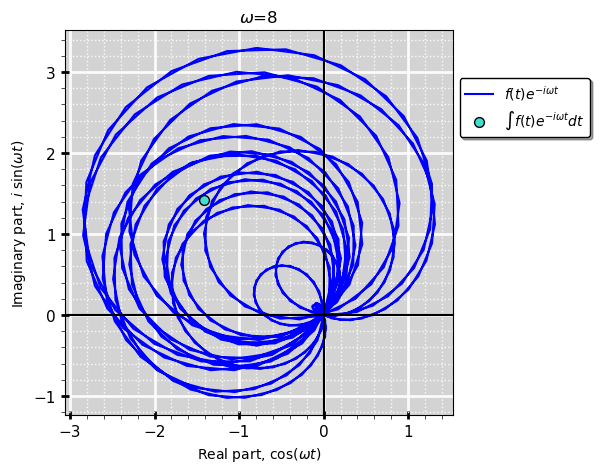

In [22]:
complex = ft.transform(angular_freq=8, plot=True)

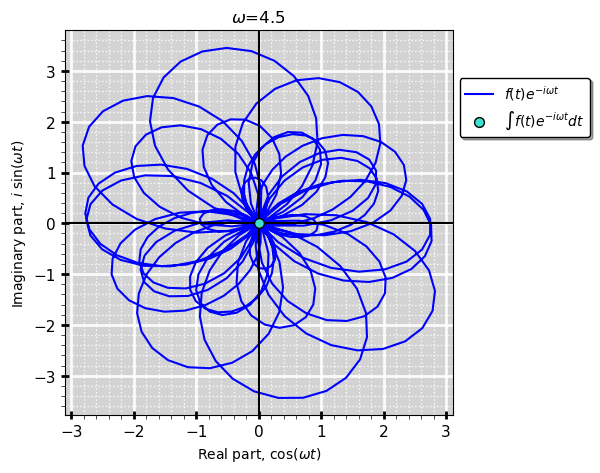

In [23]:
complex = ft.transform(angular_freq=4.5, plot=True)

# Discrete Fourier transform

Similarly to continous Fourier transformation:

$
\hat{F}(f,t) = \int_{-\infty}^{\infty} f(t) \ e^{-i 2 \pi f t}dt,
$

In discrete one, we do not have access to a continuous function describing the signal. Instead, we only have a sequence of sampled points $x_n$, denoted as representing the signal at discrete time intervals. Similarly, for the angle of rotation, this is not a continuous variable; rather, each sampled point can be represented as a point on the complex plane using the roots of unity $\frac{2\pi k}{N}$. Roots of unity are spaced evenly creating a regular polygon.

$
X_k = \sum_{n=1}^{N-1} x_n \ e^{-i \frac{2 \pi k}{N} n},
$

where $N$ is a total number of samples and $k = 0, 1, 2 \dots N-1$

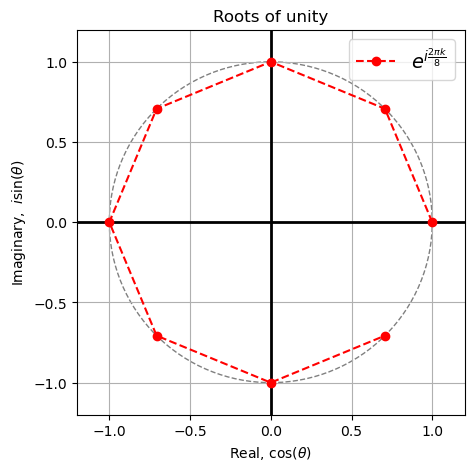

In [24]:
def nroots(n_roots):
    angles = np.linspace(0, 2 * np.pi, n_roots, endpoint=False)
    return np.exp(1j * angles)

y = nroots(n_roots=8)

plt.figure(figsize=(5,5))
plt.plot(np.real(y), np.imag(y), "o--", color="red", label=r"$e^{i \frac{2\pi k}{8}}$", zorder=3)
plt.axhline(0, color='black', lw=2)
plt.axvline(0, color='black', lw=2)
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.xlabel(r"Real, cos($\theta$)")
plt.ylabel(r"Imaginary,  $i$sin($\theta$)")
plt.title("Roots of unity")
plt.legend(prop=dict(size=14))
plt.grid(True)

circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

plt.show()

## Signal

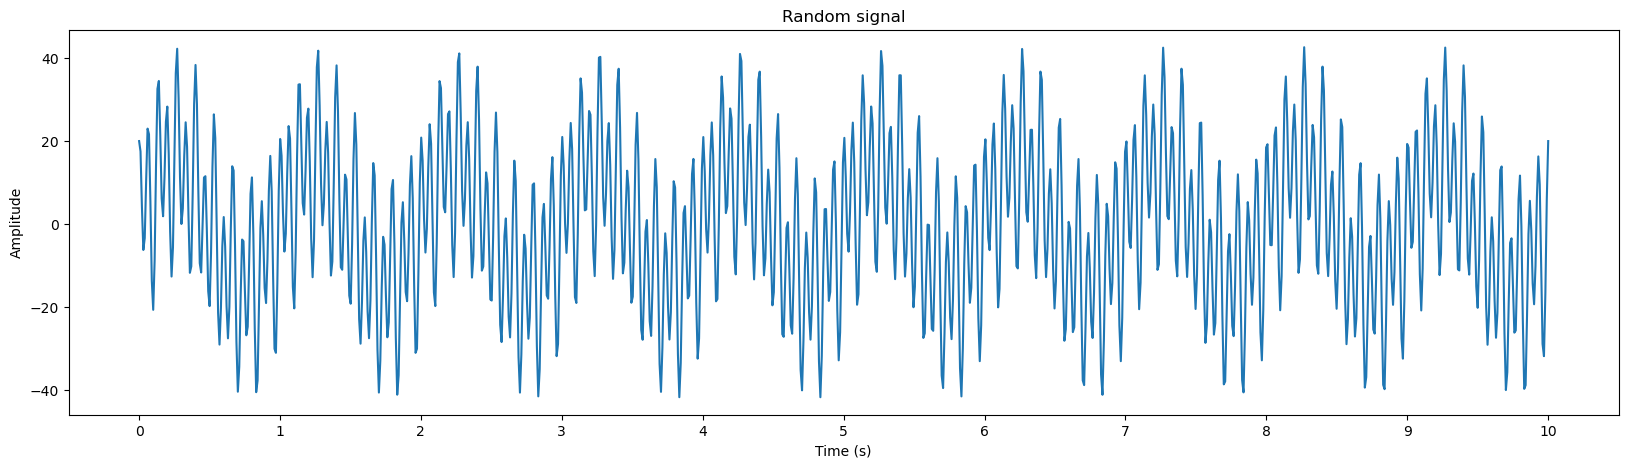

In [25]:
time = np.linspace(0, 10, 1000)
def signal_render(x):
    return 15 * np.sin(2 * np.pi * x) + 10 * np.sin(2 * np.pi * x * 8) + 20 * np.sin(2 * np.pi * x * 15 + np.pi/2)

plt.figure(figsize=(20,5))
plt.plot(time, signal_render(time))
plt.xticks(np.arange(0, 11, 1))
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Random signal")
plt.show()


If we want to detect 25 Hz waves, in respect to Nyquist limit we have to set sampling frequency to $f_s = 25 Hz * 2 = 50 Hz$. Now we wil collect 50 points in 1 scond obtaining 1 Hz resolution. To increase the resolition to 0.25 Hz (each point will now represent 0.25 Hz bin) we have to collect $N = \frac{f_s}{\Delta f} = \frac{50}{0.25} = 200$. As we collect 50 points per second we will collect the signal for $t = \frac{200}{50/s} = 4 s$

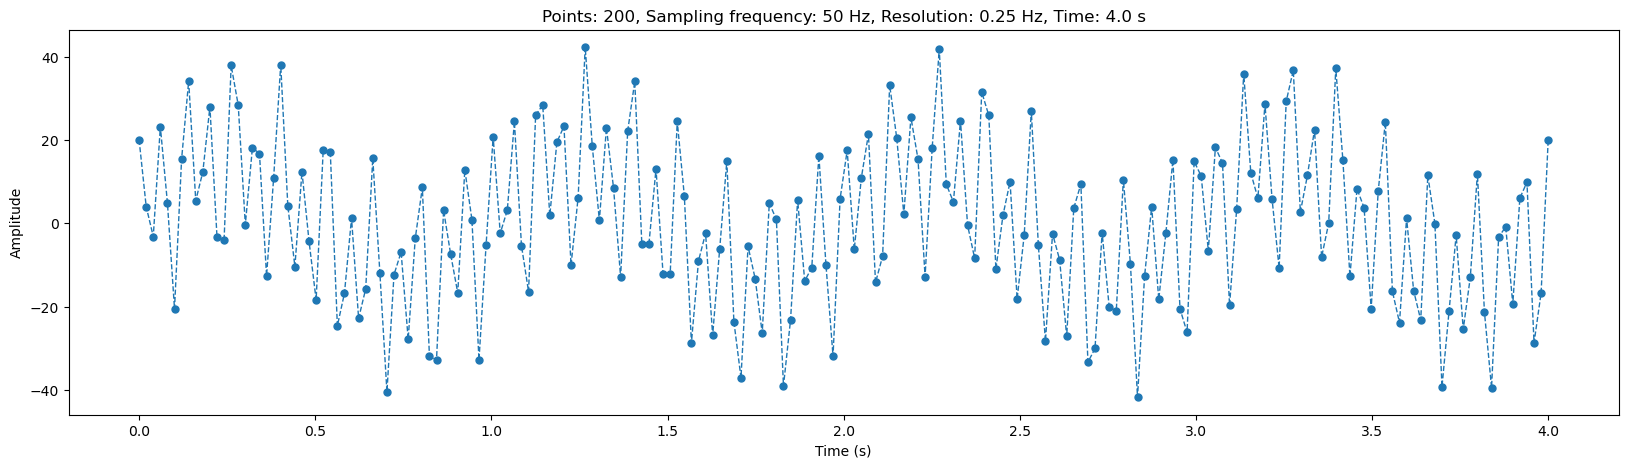

In [26]:
sampling_frequency = 50 # In respect to Nyquist limit
T = 1 / sampling_frequency
points = 200
collection_time = points/sampling_frequency

time = np.linspace(0, collection_time, points)
signal = signal_render(time)

plt.figure(figsize=(20,5))
plt.plot(time, signal_render(time), "o--", markersize=5, linewidth=1)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title(f"Points: {points}, Sampling frequency: {sampling_frequency} Hz, Resolution: {sampling_frequency/points} Hz, Time: {collection_time} s")
plt.show()

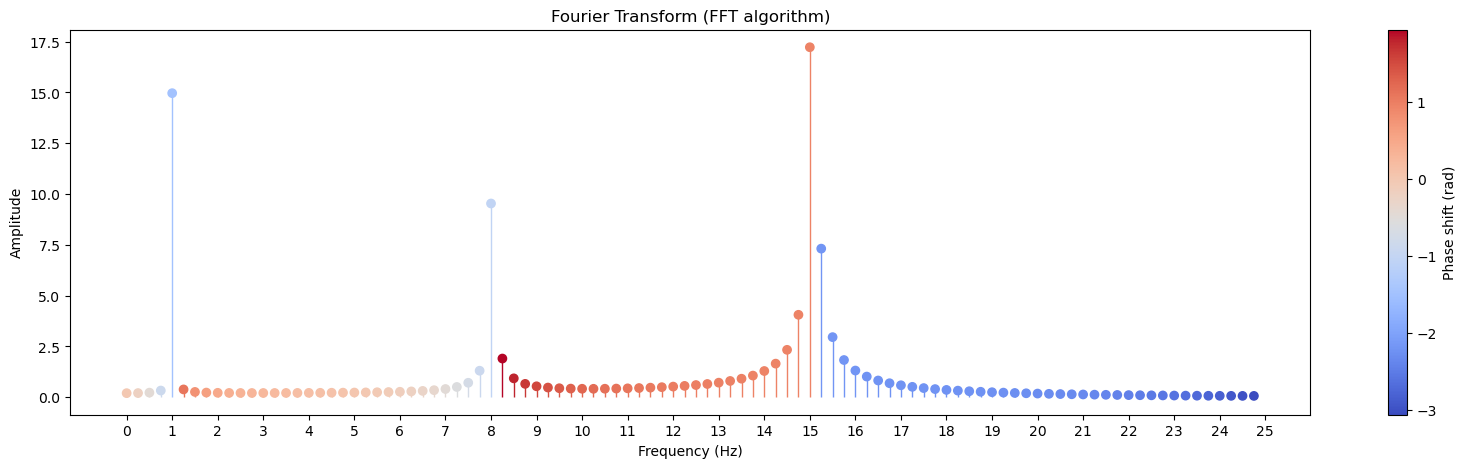

In [27]:
fourier_transform = fft(signal)
fourier_transform = fourier_transform[:points // 2]
magnitude = np.abs(fourier_transform)
phase = np.angle(fourier_transform)
frequencies = fftfreq(points, T)[:points // 2]
amplitude = 2 * magnitude / points

plt.figure(figsize=(20,5))
plt.scatter(frequencies, amplitude, cmap="coolwarm", c=phase)

for freq, amp in zip(frequencies, amplitude):
    plt.vlines(x=freq, ymin=0, ymax=amp, 
               color=plt.cm.coolwarm((phase - min(phase)) / (max(phase) - min(phase)))[frequencies.tolist().index(freq)], linewidth=1)

plt.xticks(np.arange(0, 26, 1))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("Fourier Transform (FFT algorithm)")
plt.colorbar(label="Phase shift (rad)")
plt.show()

In [28]:
df = pd.DataFrame(
    {
        "Frequency": frequencies,
        "Amplitude": amplitude,
        "Phase": phase
    })
df.query("Amplitude > 5")

,Frequency,Amplitude,Phase
4,1.00,14.965260,-1.494546
32,8.00,9.535332,-1.039765
60,15.00,17.226427,0.947892
61,15.25,7.313601,-2.195883
